In [1]:
#!conda install matplotlib -y

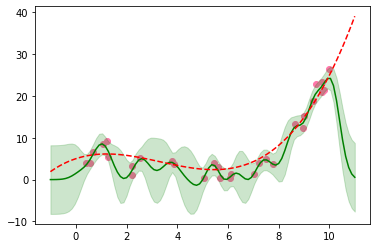

In [2]:
# „Ç¨„Ç¶„ÇπÈÅéÁ®ã „ÄÄ-kernel: RBFÔºàÊîæÂ∞ÑÂü∫Â∫ïÈñ¢Êï∞Ôºâ - „Éë„É©„É°„Éº„Çø„ÅÆË™øÊï¥

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class RBFkernel:
    def __init__(self,*param):
        self.param = list(param)

    def __call__(self,x1,x2):
        a,s,w = self.param
        return a**2*np.exp(-((x1-x2)/s)**2) + w*(x1==x2)

def y(x): # Áü•„Çä„Åü„ÅÑÈñ¢Êï∞„ÅÆÊ≠£‰Ωì
    return 0.1*x**3-x**2+2*x+5

x0 = np.random.uniform(0,10,30) # Êó¢Áü•„ÅÆÁÇπ
y0 = y(x0) + np.random.normal(0,2,30) # Èñ¢Êï∞„Å´„Éé„Ç§„Ç∫„ÇíÂä†„Åà„Çã
x1 = np.linspace(-1,11,101) # Êé¢„ÅôÁÇπ

kernel = RBFkernel(8,0.5,3.5) # ÈÅ©ÂΩì„Å™„Éë„É©„É°„Éº„Çø„Çí‰Ωø„ÅÜ„Ç´„Éº„Éç„É´Èñ¢Êï∞

k00 = kernel(*np.meshgrid(x0,x0))
k00_1 = np.linalg.inv(k00) # ÈÄÜË°åÂàó
k01 = kernel(*np.meshgrid(x0,x1,indexing='ij'))
k10 = k01.T
k11 = kernel(*np.meshgrid(x1,x1))

# „Åì„Åì„Åß„ÅØ‰∏äËø∞„ÅÆÊñπÁ®ãÂºè„ÅÆÈÄö„Çä„ÅÆŒº„Å®Œ£
mu = k10.dot(k00_1.dot(y0))
sigma = k11 - k10.dot(k00_1.dot(k01))

plt.scatter(x0,y0,c='#ff77aa')
plt.plot(x1,mu,'g') # Êé®Ê∏¨„Åï„Çå„ÅüÂπ≥Âùá
plt.plot(x1,y(x1),'--r') # Êú¨Áâ©„ÅÆÈñ¢Êï∞
std = np.sqrt(sigma.diagonal()) # ÂêÑÁÇπ„ÅÆÊ®ôÊ∫ñÂÅèÂ∑Æ„ÅØÂÖ±ÂàÜÊï£Ë°åÂàó„ÅÆÂØæËßíÊàêÂàÜ
plt.fill_between(x1,mu-std,mu+std,alpha=0.2,color='g') # Êé®Ê∏¨„Åï„Çå„ÅüÊ®ôÊ∫ñÂÅèÂ∑Æ„ÅÆ‰∏≠„ÅÆÈ†òÂüü
plt.show()

In [3]:
#!conda install imageio -y

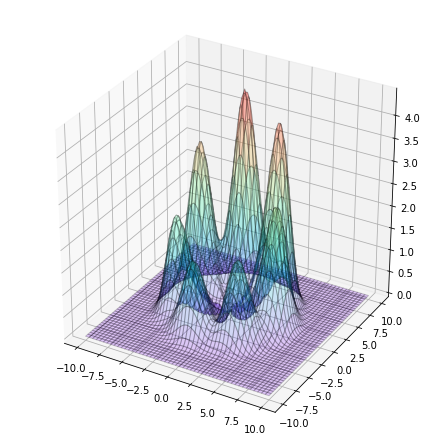

In [4]:
# MCMC -numpy -„É¢„É≥„ÉÜ„Ç´„É´„É≠Ê≥ï

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def fn(xy):
    x,y = xy
    return np.exp(-(5**2-(x**2+y**2))**2/250 + xy[1]/10) * (7./4-np.sin(7*np.arctan2(x,y)))

plt.figure(figsize=[6,6])
mx,my = np.meshgrid(np.linspace(-10,10,101),np.linspace(-10,10,101))
mz = fn([mx,my])
ax = plt.axes([0,0,1,1],projection='3d')
ax.plot_surface(mx,my,mz,rstride=2,cstride=2,alpha=0.2,edgecolor='k',cmap='rainbow')
plt.show()


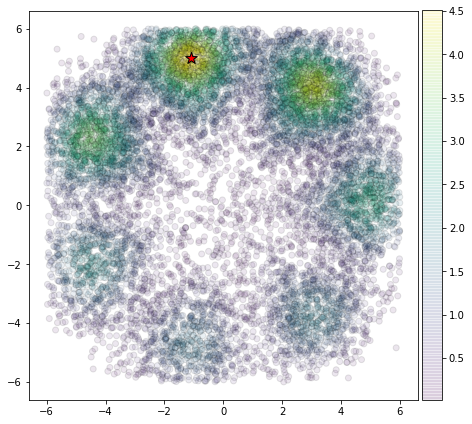

In [5]:
xy0 = np.array([3,-3]) # ÈñãÂßã„ÅÆ‰ΩçÁΩÆ
bound = np.array([[-6,6],[-6,6]]) # ‰∏ãÈôê‰∏äÈôê
s = (bound[:,1]-bound[:,0])/10. # ÊØéÂõû„Å©„Çå„Åè„Çâ„ÅÑÈÅ†„ÅèÁßªÂãï„Åô„Çã„Åã
n = 16000 # ‰ΩïÂ∫¶Áπ∞„ÇäËøî„Åô„Åã
xy = [] # ÊØéÂõû„ÅÆ‰ΩçÁΩÆ„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
p = [] # ÊØéÂõû„ÅÆÁ¢∫Áéá„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
p0 = fn(xy0) # ÈñãÂßã„ÅÆ‰ΩçÁΩÆ„ÅÆÁ¢∫Áéá
for i in range(n):
    idou = np.random.normal(0,s,2) # ÁßªÂãï„Åô„ÇãË∑ùÈõ¢
    hazure = (xy0+idou<bound[:,0])|(xy0+idou>bound[:,1]) # ‰∏ãÈôê‰∏äÈôê„Åã„ÇâÂ§ñ„Çå„Åü„Åã
    while(np.any(hazure)):
        idou[hazure] = np.random.normal(0,s,2)[hazure] # Â§ñ„Çå„Åü„ÇÇ„ÅÆ„Å†„Åë„ÇÇ„ÅÜ‰∏ÄÂ∫¶„É©„É≥„ÉÄ„É†„Åô„Çã
        hazure = (xy0+idou<bound[:,0])|(xy0+idou>bound[:,1])
    xy1 = xy0 + idou # Êñ∞„Åó„ÅÑ‰ΩçÁΩÆ„ÅÆÂÄôË£ú
    p1 = fn(xy1) # Êñ∞„Åó„ÅÑ‰ΩçÁΩÆ„ÅÆÁ¢∫Áéá
    r = p1/p0 # Êñ∞„Åó„ÅÑ‰ΩçÁΩÆ„Å®ÁèæÂú®„ÅÆ‰ΩçÁΩÆ„ÅÆÁ¢∫Áéá„ÅÆÊØîÁéá
    # ÊØîÁéá„ÅØ1„Çà„ÇäÈ´ò„ÅÑÂ†¥Âêà„ÅØÂ∏∏„Å´ÁßªÂãï„Åô„Çã„Åå„ÄÅ‰Ωé„ÅÑÂ†¥Âêà„ÅØÁ¢∫Áéá„ÅßÁßªÂãï„Åô„Çã
    if(r>1 or r>np.random.random()):
        xy0 = xy1 # ÁèæÂú®„ÅÆ‰ΩçÁΩÆ„ÇíÊñ∞„Åó„ÅÑ‰ΩçÁΩÆ„Å´ÁßªÂãï„Åô„Çã
        p0 = p1
        xy.append(xy0) # Êñ∞„Åó„ÅÑ‰ΩçÁΩÆ„ÇíÊ†ºÁ¥ç
        p.append(p0) # Êñ∞„Åó„ÅÑÁ¢∫Áéá„ÇíÊ†ºÁ¥ç

xy = np.stack(xy)
x,y = xy[:,0],xy[:,1]
plt.figure(figsize=[7,6])
plt.gca(aspect=1)
plt.scatter(x,y,c=p,alpha=0.1,edgecolor='k')
plt.colorbar(pad=0.01)
plt.scatter(*xy[np.argmax(p)],s=150,c='r',marker='*',edgecolor='k') # ÊúÄÂ§ßÂÄ§„ÇíÊòü„ÅßÁ§∫„Åô
plt.tight_layout()
plt.show()

In [6]:
#!conda install emcee -y

emcee„ÅØpymc3„ÅÆ„Çà„ÅÜ„Å´„Åü„Åè„Åï„ÇìÂàÜÂ∏ÉÈñ¢Êï∞„ÇíÊ∫ñÂÇô„Åó„Å¶„Åä„ÅÑ„Å¶„ÅÇ„Çã„ÅÆ„Åß„ÅØ„Å™„Åè„ÄÅËá™ÂàÜ„ÅßÂàÜÂ∏ÉÈñ¢Êï∞„ÇíÂÆöÁæ©„Åó„Å™„Åë„Çå„Å∞„Å™„Çâ„Å™„ÅÑ„Åå„ÄÅËâ≤„ÄÖÊâãÂãï„ÅßÊõ∏„Åè„ÅÆ„ÅßËá™Áî±Â∫¶„ÅåÈ´ò„ÅÑ„Åß„Åô„ÄÇÊ©üËÉΩ„ÅØpymc3„Çà„ÇäÂ∞ë„Å™„ÅÑ„Åå„ÄÅÂçò„Å™„Çã„Çµ„É≥„Éó„É™„É≥„Ç∞„Çí„Åó„Åü„ÅÑ„Å†„Åë„Å™„ÇâÂçÅÂàÜ„ÄÇ„ÇÄ„Åó„ÇçÊ©üËÉΩ„ÅåÂ∞ë„Å™„ÅÑ„Åã„ÇâÂãâÂº∑„Åó„ÇÑ„Åô„ÅÑ„Åó„ÄÅ‰ΩôË®à„Å™„Åì„Å®„ÇíË¶ö„Åà„Å™„Åè„Å¶„ÇÇ‰Ωø„Åà„Åæ„Åô„ÄÇ

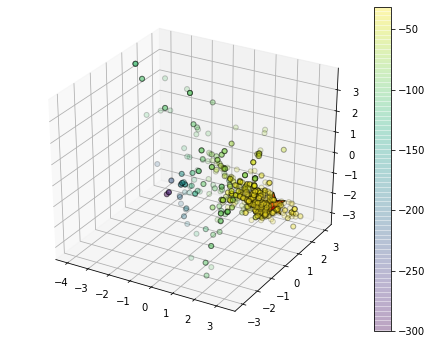

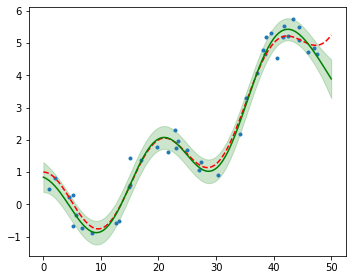

In [7]:
# „É¢„Ç∏„É•„Éº„É´„Çí‰Ωø„Å£„Å¶„Ç¨„Ç¶„ÇπÈÅéÁ®ã„ÇíÂÆüË£Ö„Åô„ÇãÊñπÊ≥ïüëá„ÄÄ-emcee„Å®„ÅÑ„ÅÜ„É¢„Ç∏„É•„Éº„É´„ÅßMCMC„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ

from sklearn.gaussian_process.kernels import RBF,WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
import emcee

def y(x):
    return np.cos(np.pi/10*x) + x**2/400 # ÂÆüÈöõ„ÅÆÈñ¢Êï∞

n = 40
x0 = np.random.uniform(0,50,n)
y0 = y(x0) + np.random.normal(0,0.25,n)
x1 = np.linspace(0,50,201)

kernel = 1*RBF()+WhiteKernel() # sklearn„ÅÆ„Ç´„Éº„Éç„É´
gp = GPR(kernel,alpha=0,optimizer=None) # MCMC„ÅßÊúÄÈÅ©Âåñ„Åô„Çã„ÅÆ„Åß„ÄÅ„Åì„Åì„Åß„ÅØoptimizer=None
gp.fit(x0[:,None],y0)

bound = np.array([[0.001,1000],[0.001,1000],[0.001,1000]]) # ‰∏ãÈôê‰∏äÈôê
logbound = np.log(bound)

def lllh(theta): # emcee„Å´‰Ωø„ÅÜÂàÜÂ∏ÉÈñ¢Êï∞
    if(np.any(theta<logbound[:,0])|np.any(theta>logbound[:,1])):
        return -np.inf
    return gp.log_marginal_likelihood(theta)

nwalker = 20
ndim = len(gp.kernel.theta)
nstep = 50
theta0 = np.random.uniform(-2,2,[nwalker,ndim]) # „Éë„É©„É°„Éº„Çø„ÅÆÂàùÊúüÂÄ§
sampler = emcee.EnsembleSampler(nwalker,ndim,lllh)
sampler.run_mcmc(theta0,nstep)
theta = sampler.flatchain[sampler.flatlnprobability.argmax()] # Â∞§Â∫¶„Çí‰∏ÄÁï™È´ò„Åè„Åô„Çã„Éë„É©„É°„Éº„Çø
gp.kernel.theta = theta # Êñ∞„Åó„ÅèÂæó„Çâ„Çå„Åü„Éë„É©„É°„Éº„Çø„ÇíË®≠ÂÆö„Åô„Çã
gp.fit(x0[:,None],y0) # Êñ∞„Åó„ÅÑ„Éë„É©„É°„Éº„Çø„Åß„ÇÇ„ÅÜ‰∏ÄÂ∫¶Â≠¶Áøí„Åï„Åõ„Çã

# „Çµ„É≥„Éó„É™„É≥„Ç∞„Åï„Çå„Åü„Éë„É©„É°„Éº„Çø„ÅÆÂÄ§„ÅÆÂàÜÂ∏É
fig = plt.figure(figsize=[6,4.5])
ax = fig.add_axes([0,0,1,1],projection='3d')
sc = ax.scatter(*sampler.flatchain.T,alpha=0.2,s=100,c=sampler.flatlnprobability,marker='.',edgecolor='k')
plt.colorbar(sc,pad=0)
ax.scatter(*theta,s=600,c='r',edgecolor='k',marker='*') # ÊúÄÂ§ßÂÄ§„ÅÆ‰ΩçÁΩÆ„ÇíÊèè„Åè

# Ëøë‰ºº„ÅÆÁµêÊûú
plt.figure(figsize=[5,4])
plt.plot(x0,y0,'. ')
mu,std = gp.predict(x1[:,None],return_std=True)
plt.plot(x1,y(x1),'--r')
plt.plot(x1,mu,'g')
plt.fill_between(x1,mu-std,mu+std,alpha=0.2,color='g')
plt.tight_layout()
plt.show()

In [8]:
#!conda install pymc3 -y